In [6]:
import torch
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (13.0, 5.0)

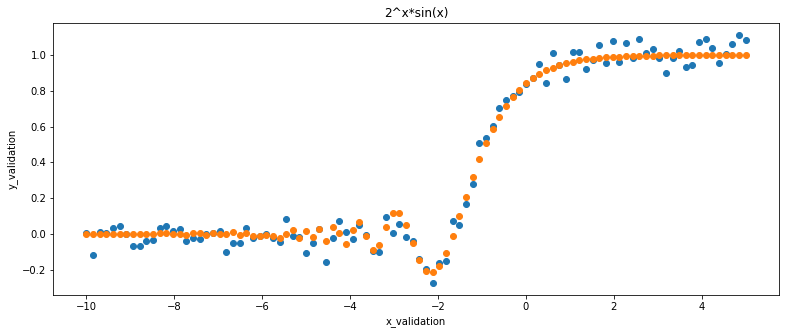

In [21]:
# ------Dataset preparation start--------:
x_train =  torch.linspace(-10, 5, 100)
y_train = target_function(x_train)
noise = torch.randn(y_train.shape) / 20.
y_train = y_train + noise
x_train.unsqueeze_(1)
y_train.unsqueeze_(1)

x_validation = torch.linspace(-10, 5, 100)
y_validation = target_function(x_validation)
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1)
# ------Dataset preparation end--------:

plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('$y = 2^x*sin(x)$');
plt.plot(x_validation.numpy(), y_validation.numpy(), 'o')
plt.title('2^x*sin(x)')
plt.xlabel('x_validation')
plt.ylabel('y_validation');

In [8]:
def target_function(x):
    return 2**x * torch.sin(2**-x)

def loss(pred, target):
    MAE = (pred - target).abs().mean()
    return MAE.mean()


In [110]:
class RegressionNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(RegressionNet, self).__init__()
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
        self.act1 = torch.nn.Tanh()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
        self.act2 = torch.nn.Tanh()
        self.fc3 = torch.nn.Linear(n_hidden_neurons, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)
        return x


In [111]:
def predict(net, x, y):
    y_pred = net.forward(x)

    plt.plot(x.numpy(), y.numpy(), 'o', label='Groud truth')
    plt.plot(x.numpy(), y_pred.data.numpy(), 'o', c='r', label='Prediction');
    plt.legend(loc='upper left')
    plt.xlabel('$x$')
    plt.ylabel('$y$')

In [112]:
lr = 0.01
num_epoch = 100
n_hidden_neurons = 100

In [113]:
net = RegressionNet(n_hidden_neurons)
optimizer = torch.optim.Adam(net.parameters(), lr=lr)


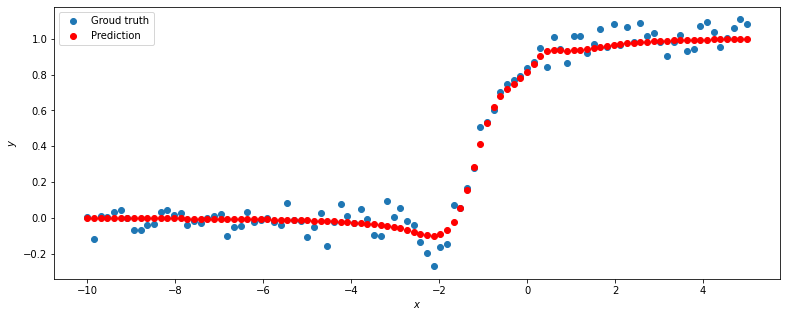

In [114]:
for epoch_index in range(num_epoch):
    optimizer.zero_grad()

    y_pred = net.forward(x_train)
    loss_value = loss(y_pred, y_train)
    loss_value.backward()
    optimizer.step()
predict(net, x_train, y_train)

In [115]:
def metric(pred, target):
   return (pred - target).abs().mean()

print(metric(net.forward(x_validation), y_validation).item())

0.02343493513762951
